In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.coordinates
from scipy.optimize import curve_fit

In [2]:
# Importing queried data from Gaia. This data is 20 arcmin around the cluster center coordinates.
df = pd.read_table('asu_cmd.tsv', delimiter='\t', na_values = 0, skip_blank_lines=True)

In [3]:
len(df)

43953

In [4]:
# Converting the required object data type columns to float64 
df['pmRA'] = pd.to_numeric(df['pmRA'], errors='coerce')
df['pmDE'] = pd.to_numeric(df['pmDE'], errors='coerce')
df['Gmag'] = pd.to_numeric(df['Gmag'], errors='coerce')
df['Plx'] = pd.to_numeric(df['Plx'], errors='coerce')
df['BP-RP'] = pd.to_numeric(df['BP-RP'], errors='coerce')
df['e_Gmag'] = pd.to_numeric(df['e_Gmag'], errors='coerce')
df['e_pmRA'] = pd.to_numeric(df['e_pmRA'], errors='coerce')
df['e_pmDE'] = pd.to_numeric(df['e_pmDE'], errors='coerce')
df['e_Plx'] = pd.to_numeric(df['e_Plx'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
df['E(BP/RP)'] = pd.to_numeric(df['E(BP/RP)'], errors='coerce')
df['E(BP-RP)'] = pd.to_numeric(df['E(BP-RP)'], errors='coerce')
df['E(BP-RP)'] = pd.to_numeric(df['E(BP-RP)'], errors='coerce')
df['[Fe/H]'] = pd.to_numeric(df['[Fe/H]'], errors='coerce')
df['BPmag'] = pd.to_numeric(df['BPmag'], errors='coerce')
df['RPmag'] = pd.to_numeric(df['RPmag'], errors='coerce')
df['e_BPmag'] = pd.to_numeric(df['e_BPmag'], errors='coerce')
df['e_RPmag'] = pd.to_numeric(df['e_RPmag'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43953 entries, 0 to 43952
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _r         43953 non-null  float64
 1   _p         43946 non-null  float64
 2   _x         43953 non-null  float64
 3   _y         43953 non-null  float64
 4   _RAJ2000   43953 non-null  float64
 5   _DEJ2000   43953 non-null  float64
 6   RA_ICRS    43953 non-null  float64
 7   DE_ICRS    43953 non-null  float64
 8   Source     43953 non-null  float64
 9   e_RA_ICRS  43953 non-null  float64
 10  e_DE_ICRS  43953 non-null  float64
 11  Plx        39218 non-null  float64
 12  e_Plx      39218 non-null  float64
 13  PM         43953 non-null  object 
 14  pmRA       39194 non-null  float64
 15  e_pmRA     39218 non-null  float64
 16  pmDE       39206 non-null  float64
 17  e_pmDE     39218 non-null  float64
 18  RUWE       43953 non-null  object 
 19  Gmag       43902 non-null  float64
 20  e_Gmag

# Initial DF

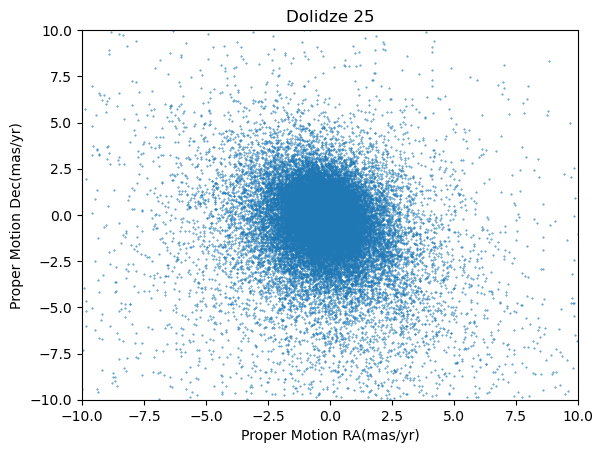

In [6]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df.pmRA,df.pmDE,s=0.15)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

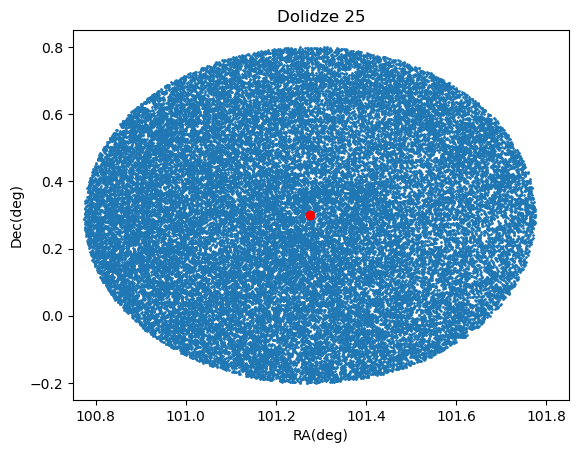

In [7]:
# Plotting RA and Dec of the cluster
fig, ax = plt.subplots()

ax.scatter(df._RAJ2000, df._DEJ2000, s=1)
ax.set(xlim=(100.75,101.85),ylim=(-0.25,0.85))
ax.scatter(101.275, 0.3, color='red', label='center')
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25')
plt.show()

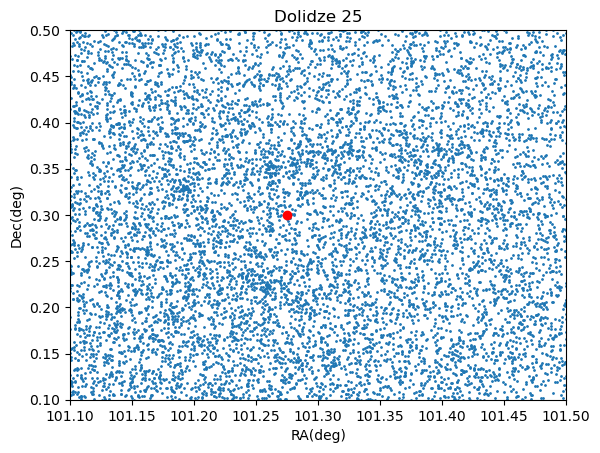

In [8]:
# Same plot as above but with magnified view of the cluster
fig, ax = plt.subplots()

ax.scatter(df._RAJ2000, df._DEJ2000, s=1)
ax.set(xlim=(101.1,101.5),ylim=(0.1,0.5))
ax.scatter(101.275, 0.3, color='red', label='center')
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25')
plt.show()

In [227]:
df['M_Gmag_theory'] = df.apply(lambda row : absmag(row['Gmag'], 2666,0.88),axis=1)

# DF filtered with distance

Now we are filtering the stars with are outside the circumference of the cluster with radius 19 arcminutes. 
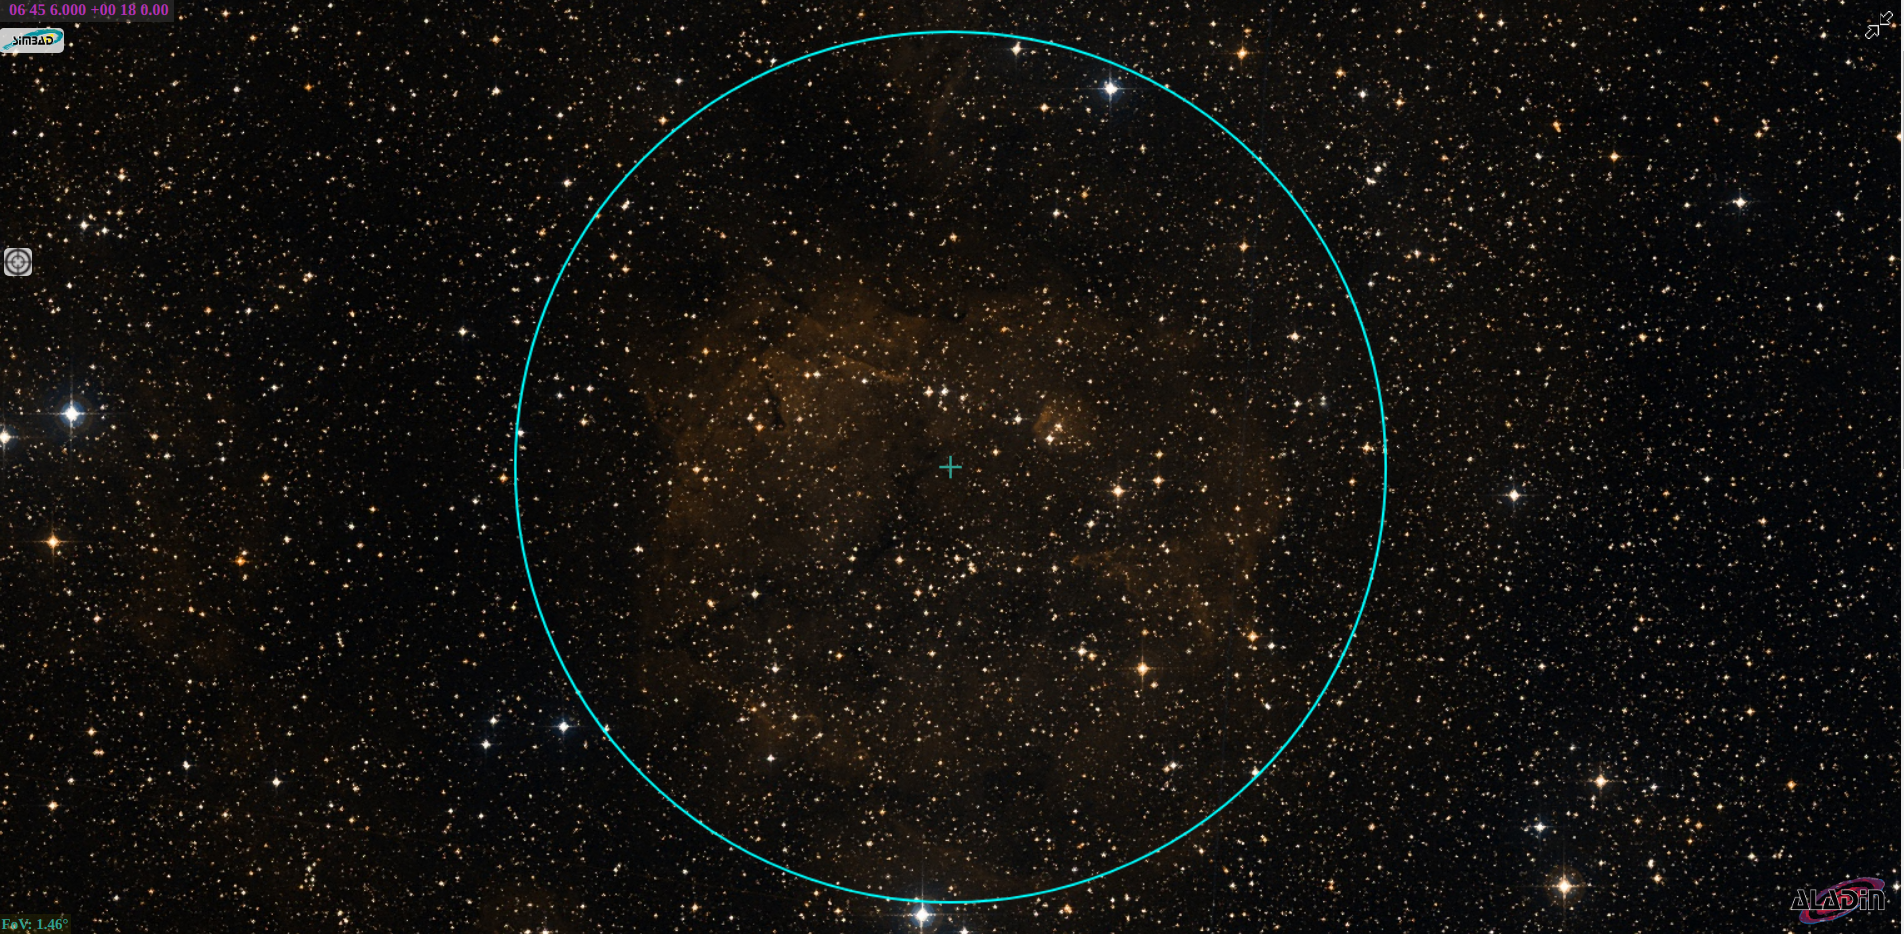

In [10]:
center = astropy.coordinates.get_icrs_coordinates('Dolidze 25')
print(center)

<SkyCoord (ICRS): (ra, dec) in deg
    (101.275, 0.3)>


In [11]:
# Function to calculate the distance of each star from cluster center acquired from sesame Name resolver-CDS 
def angular_dist(ra_star,dec_star):
    ra_c = 101.275
    dec_c = 0.3

    a = (np.sin((np.abs(np.radians(dec_c) - np.radians(dec_star)))/2)) ** 2
    b = np.cos(np.radians(dec_c)) * np.cos(np.radians(dec_star)) *(np.sin((np.abs(np.radians(ra_c) - np.radians(ra_star)))/2)) ** 2
  
    # distance
    d = 2 * np.arcsin(np.sqrt(a + b))
  
    return np.degrees(d)

In [12]:
# Creating a column named dist_center containing distance of star from cluster center
df['dist_center'] = df.apply(lambda row : angular_dist(row['RAJ2000'],row['DEJ2000']),axis=1)

We take radius as 19 arcminutes

In [102]:
# Definig a new dataframe consisting of only cluster members. This is done with use of cluster radius(19 arcmins). 
df_mem_dist = df[df['dist_center'] <= 9/60]
len(df_mem_dist)

4393

In [103]:
df_mem_dist.head()

_r     _p      _x      _y    _RAJ2000  _DEJ2000     RA_ICRS   DE_ICRS  \
0  0.1449  245.2 -0.1316 -0.0607  101.272809  0.298983  101.272807  0.298989   
1  0.1718  172.3  0.0232 -0.1702  101.275383  0.297168  101.275386  0.297163   
2  0.1743  184.8 -0.0145 -0.1737  101.274758  0.297104  101.274759  0.297106   
3  0.2200   73.6  0.2111  0.0622  101.278518  0.301044  101.278518  0.301036   
4  0.2566  180.1 -0.0006 -0.2566  101.274993  0.295713  101.274990  0.295723   

         Source  e_RA_ICRS  ...   e_RV     Teff     logg  [Fe/H]        Dist  \
0  3.125513e+18     0.2034  ...          3888.6   5.0542 -1.6437     560.261   
1  3.125513e+18     0.2051  ...          3523.5   4.5624 -1.5899    509.8664   
2  3.125513e+18     0.2149  ...                              NaN               
3  3.125513e+18     0.0614  ...          5553.7   4.7198 -1.6536   1060.8922   
4  3.125513e+18     0.0860  ...          5171.9   4.7712 -2.4446   1003.4904   

       AG  E(BP-RP)     RAJ2000   DEJ2000  dist_center  
0  0.0186    0.0100  101.272809  0.298983     0.002415  
1  0.0303    0.0165  101.275383  0.297168     0.002857  
2     NaN       NaN  101.274758  0.297104     0.002906  
3  0.8001    0.4396  101.278518  0.301044     0.003669  
4  0.8756    0.4835  101.274993  0.295713     0.004287  

[5 rows x 40 columns]

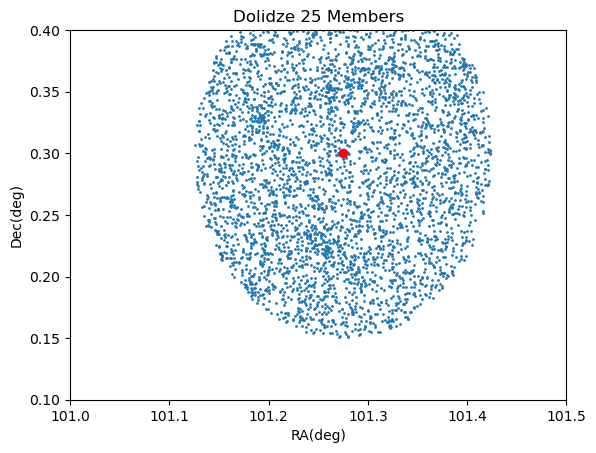

In [104]:
## Plotting RA and Dec of the cluster members
fig, ax = plt.subplots()

ax.scatter(df_mem_dist.RAJ2000, df_mem_dist.DEJ2000, s=1)
ax.set(xlim=(101.0,101.5),ylim=(0.1,0.4))
ax.scatter(101.275, 0.3, color='red', label='center') # center of the cluster
ax.set_xlabel('RA(deg)')
ax.set_ylabel('Dec(deg)')
ax.set_title('Dolidze 25 Members')
plt.show()

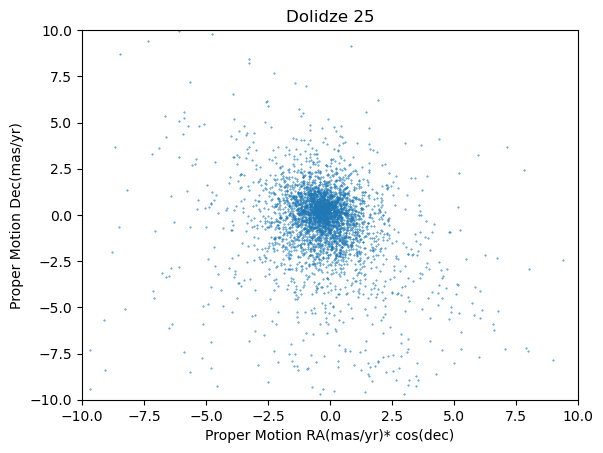

In [105]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df_mem_dist.pmRA*np.cos(df_mem_dist['_DEJ2000']),df_mem_dist.pmDE,s=0.15)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)* cos(dec)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

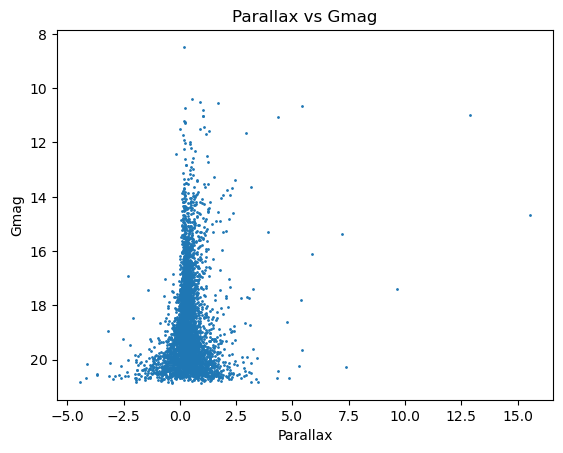

In [106]:
# The parallax vs Gmag graph helps us filter out more non-members of the star cluster (???)
fig, ax = plt.subplots()

ax.scatter(df_mem_dist['Plx'],df_mem_dist['Gmag'],s=1)
ax.set_xlabel('Parallax')
ax.set_ylabel('Gmag')
ax.set_title('Parallax vs Gmag')
plt.gca().invert_yaxis()

# Filtered with E_Gmag,e_pmRA,e_pmDE,Plx/e_plx

In [107]:
df_nerrcorrect = df_mem_dist.copy(deep=True)

In [108]:
df_nerrcorrect['Plx/e_Plx'] = df_nerrcorrect['Plx'] / df_nerrcorrect['e_Plx']

In [109]:
df_G = df_nerrcorrect[
    (df_nerrcorrect['e_Gmag'] < 0.1) &
    (df_nerrcorrect['e_BPmag'] < 0.1) &
    (df_nerrcorrect['e_RPmag'] < 0.1) &
    (df_nerrcorrect['e_pmRA'] < 0.5) &
    (df_nerrcorrect['e_pmDE'] < 0.5)
]



Plx/plx_error > 5 & e(pmRA&pmDE)<0.5

In [110]:
len(df_G)

2222

# df made by considering errors in pmRA and pmDE

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 4.000e+00, 2.100e+01, 2.168e+03, 2.200e+01, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-111.693  ,  -99.99945,  -88.3059 ,  -76.61235,  -64.9188 ,
         -53.22525,  -41.5317 ,  -29.83815,  -18.1446 ,   -6.45105,
           5.2425 ,   16.93605,   28.6296 ,   40.32315,   52.0167 ,
          63.71025,   75.4038 ,   87.09735,   98.7909 ,  110.48445,
         122.178  ]),
 <BarContainer object of 20 artists>)

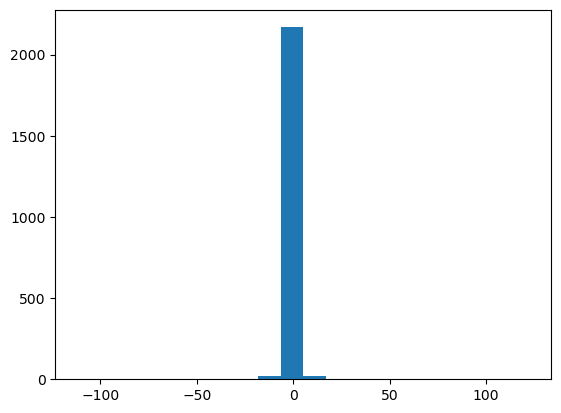

In [111]:
# Creating histogram for pmra

fig, ax = plt.subplots()
ax.hist(df_G.pmRA, bins=20)

In [112]:
Mean_pmRA = df_G['pmRA'].mean()
Std_pmRA = df_G['pmRA'].std()
print(Mean_pmRA)
print(Std_pmRA)

-0.33156866276452046
4.2948268149741695


In [113]:
Mean_pmDE = df_G['pmDE'].mean()
Std_pmDE = df_G['pmDE'].std()
print(Mean_pmDE)
print(Std_pmDE)

-0.7707974797479749
5.723847430440778


In [114]:
lower_bound_pmRA = Mean_pmRA - 1 * Std_pmRA
upper_bound_pmRA = Mean_pmRA + 1 * Std_pmRA
lower_bound_pmDE = Mean_pmDE - 1 * Std_pmDE
upper_bound_pmDE = Mean_pmDE + 1 * Std_pmDE

In [115]:
df_srade = df_G[
    (lower_bound_pmRA < df_G['pmRA']) &
    (df_G['pmRA'] < upper_bound_pmRA) &
    (lower_bound_pmDE < df_G['pmDE']) &
    (df_G['pmDE'] < upper_bound_pmDE)
] # dataframe with approx same ra and dec

Text(0, 0.5, 'Plx')

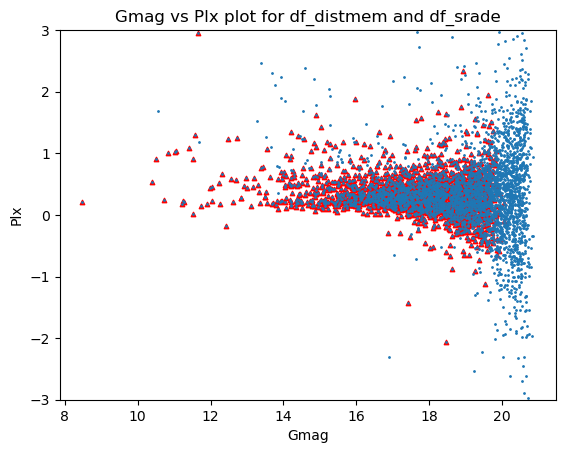

In [116]:
# Plot between initial dataframe and sPlx dataframe
plt.scatter(df_srade['Gmag'],df_srade['Plx'],s=10,marker='^',c='red')
plt.scatter(df_mem_dist['Gmag'],df_mem_dist['Plx'],s=1)
plt.title('Gmag vs Plx plot for df_distmem and df_srade')
plt.xlabel('Gmag')
plt.ylim(-3,3)
plt.ylabel('Plx')

In [117]:
len(df_srade)

2064

Text(0, 0.5, 'G_mag')

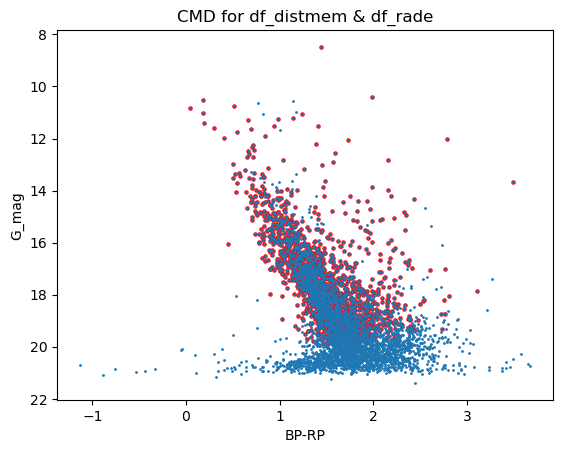

In [118]:
# Color Magnitude diagram of the star cluster(??)
plt.scatter(df_srade['BP-RP'],df_srade['Gmag'],s=5.0,c='red')
plt.scatter(df_mem_dist['BP-RP'],df_mem_dist['Gmag'],s=1.0)
plt.gca().invert_yaxis()
plt.title('CMD for df_distmem & df_rade')
plt.xlabel('BP-RP')
plt.ylabel('G_mag')

# df made by considering errors in Plx

In [119]:
Mean_Plx = df_srade['Plx'].mean()
Std_Plx = df_srade['Plx'].std()
print(Mean_Plx)
print(Std_Plx)

0.3205440891472868
0.3239454658298892


In [120]:
lower_bound_Plx = Mean_Plx - 1 * Std_Plx
upper_bound_Plx = Mean_Plx + 1 * Std_Plx

In [121]:
df_sPlx = df_srade[
    (lower_bound_Plx < df_srade['Plx']) &
    (df_srade['Plx'] < upper_bound_Plx)
] # dataframe with same parallax 

In [122]:
len(df_sPlx)

1631

(array([  1.,   0.,   1.,   1.,   2.,  10.,  31., 110., 491., 830., 404.,
        108.,  43.,  19.,   8.,   3.,   0.,   1.,   0.,   1.]),
 array([-2.0631  , -1.812325, -1.56155 , -1.310775, -1.06    , -0.809225,
        -0.55845 , -0.307675, -0.0569  ,  0.193875,  0.44465 ,  0.695425,
         0.9462  ,  1.196975,  1.44775 ,  1.698525,  1.9493  ,  2.200075,
         2.45085 ,  2.701625,  2.9524  ]),
 <BarContainer object of 20 artists>)

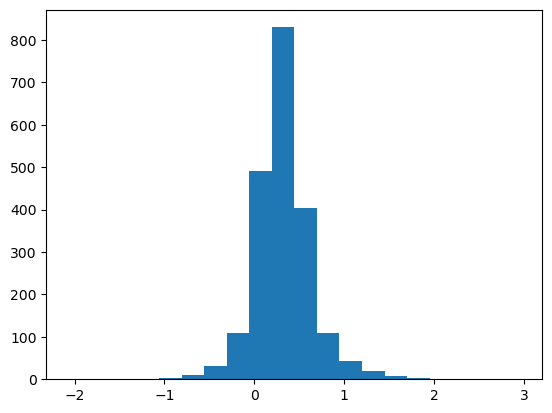

In [123]:
fig, ax = plt.subplots()
ax.hist(df_srade.Plx, bins=20)

The df 'df_sPlx' now contains all the kinematic members of the star cluster.

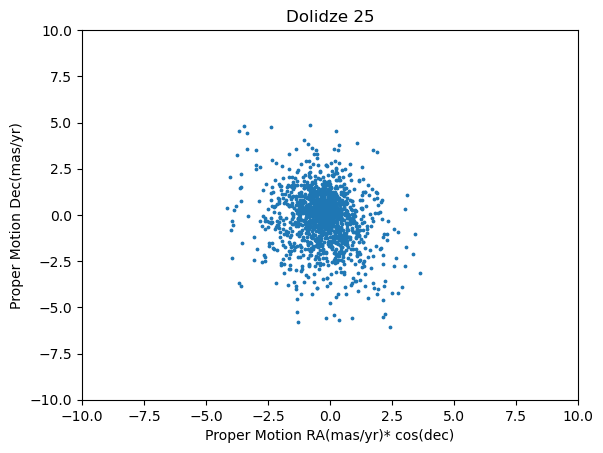

In [124]:
# Plotting the graph between proper motion in RA and Dec to analyse the motion of the cluster 
fig, ax = plt.subplots()

ax.scatter(df_sPlx.pmRA*np.cos(df_sPlx['_DEJ2000']),df_sPlx.pmDE,s=3)

ax.set(xlim=(-10,10),ylim=(-10,10))
ax.set_xlabel('Proper Motion RA(mas/yr)* cos(dec)')
ax.set_ylabel('Proper Motion Dec(mas/yr)')
ax.set_title('Dolidze 25')
plt.show()

(-0.5, 1.0)

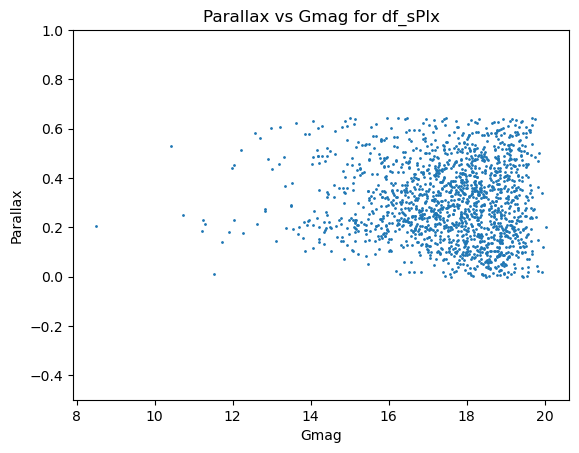

In [125]:
# The parallax vs Gmag graph helps us filter out more non-members of the star cluster (???)
fig, ax = plt.subplots()

ax.scatter(df_sPlx['Gmag'],df_sPlx['Plx'],s=1)
ax.set_xlabel('Gmag')
ax.set_ylabel('Parallax')
ax.set_title('Parallax vs Gmag for df_sPlx')
plt.ylim(-0.5,1)

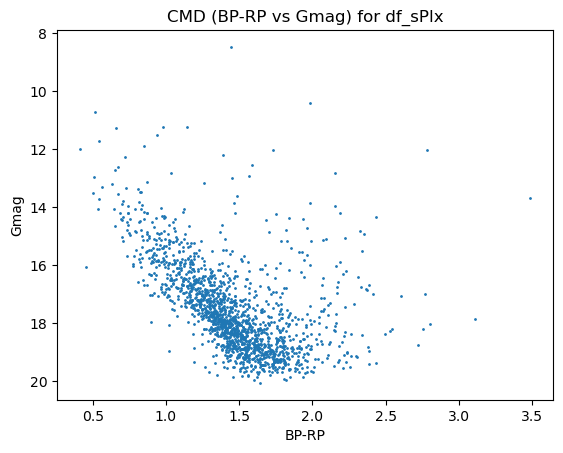

In [126]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_sPlx['BP-RP'],df_sPlx['Gmag'],s=1.0)
ax.set_xlabel('BP-RP')
ax.set_ylabel('Gmag')
ax.set_title('CMD (BP-RP vs Gmag) for df_sPlx')
plt.gca().invert_yaxis()

Text(0, 0.5, 'Plx')

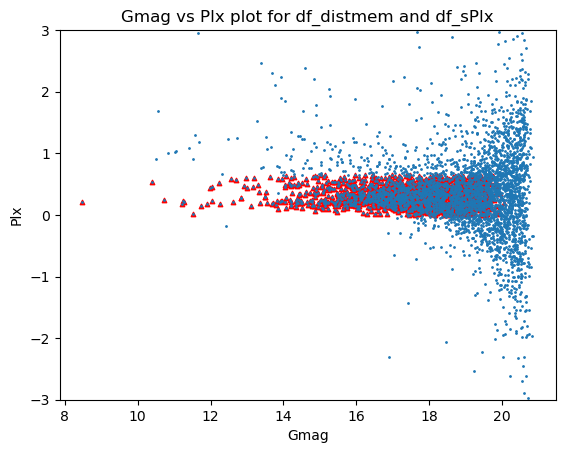

In [127]:
# Plot between initial dataframe and sPlx dataframe
plt.scatter(df_sPlx['Gmag'],df_sPlx['Plx'],s=10,marker='^',c='red')
plt.scatter(df_mem_dist['Gmag'],df_mem_dist['Plx'],s=1)
plt.title('Gmag vs Plx plot for df_distmem and df_sPlx')
plt.xlabel('Gmag')
plt.ylim(-3,3)
plt.ylabel('Plx')

# Dataframe for CMD

In [128]:
df_cmd = df_sPlx.copy(deep=True)

In [129]:
df_cmd['BPmag-RPmag'] = df_cmd['BPmag']-df_cmd['RPmag']

In [130]:
df_cmd['cPlx'] = df_cmd['Plx'] - 0.015

In [131]:
def absmag(app_mag,dist_parsecs,extinction):
    return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)

In [132]:
df_cmd['dist_parsecs'] = 1000/df_cmd['cPlx']

In [133]:
print(df_cmd['AG'].mean())

0.7330980049875311


In [134]:
print(df_cmd['E(BP-RP)'].mean())

0.4003708229426433


In [135]:
df_cmd['M_Gmag'] = df_cmd.apply(lambda row : absmag(row['Gmag'], row['dist_parsecs'], 0.88),axis=1)

/tmp/ipykernel_24053/863766239.py:2: RuntimeWarning: invalid value encountered in log10
  return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)


In [224]:
df_cmd['M_Gmag_theory'] = df_cmd.apply(lambda row : absmag(row['Gmag'], 2666,0.88),axis=1)

In [137]:
df_cmd['M_BPmag-RPmag'] = df_cmd.apply(lambda row : absmag(row['BPmag-RPmag'], row['dist_parsecs'],3.1*row['E(BP-RP)']),axis=1)

/tmp/ipykernel_24053/863766239.py:2: RuntimeWarning: invalid value encountered in log10
  return (app_mag - 5*np.log10(dist_parsecs) + 5 - extinction)


In [225]:
df_cmd['M_BPmag-RPmag_theory'] = df_cmd.apply(lambda row : absmag(row['BPmag-RPmag'], 2666,3.1*0.90),axis=1)

In [139]:
df_cmd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1 to 4392
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _r                    1631 non-null   float64
 1   _p                    1630 non-null   float64
 2   _x                    1631 non-null   float64
 3   _y                    1631 non-null   float64
 4   _RAJ2000              1631 non-null   float64
 5   _DEJ2000              1631 non-null   float64
 6   RA_ICRS               1631 non-null   float64
 7   DE_ICRS               1631 non-null   float64
 8   Source                1631 non-null   float64
 9   e_RA_ICRS             1631 non-null   float64
 10  e_DE_ICRS             1631 non-null   float64
 11  Plx                   1631 non-null   float64
 12  e_Plx                 1631 non-null   float64
 13  PM                    1631 non-null   object 
 14  pmRA                  1631 non-null   float64
 15  e_pmRA               

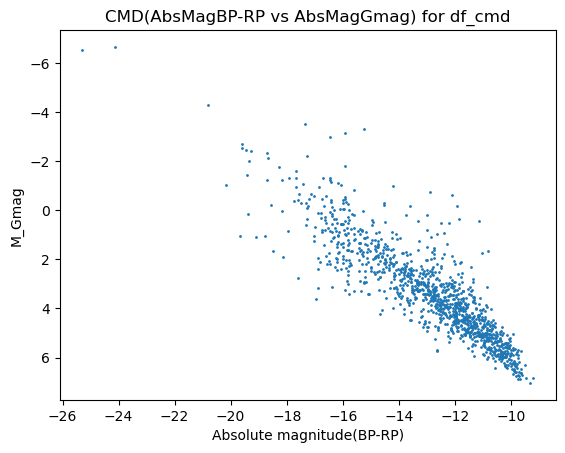

In [140]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_cmd['M_BPmag-RPmag'],df_cmd['M_Gmag'],s=1.0)
ax.set_xlabel('Absolute magnitude(BP-RP)')
ax.set_ylabel('M_Gmag')
ax.set_title('CMD(AbsMag''BP-RP'' vs AbsMag''Gmag'') for df_cmd')
plt.gca().invert_yaxis()

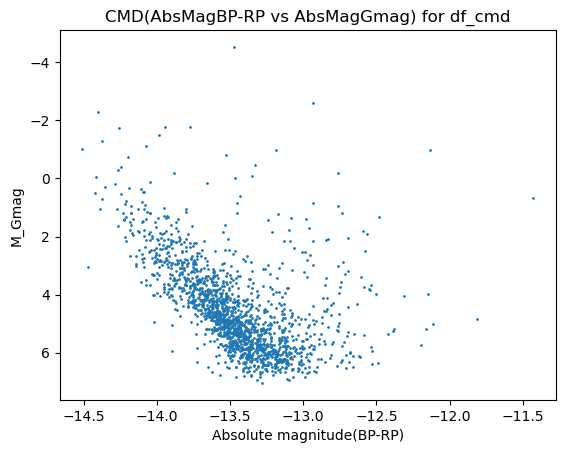

In [141]:
# Color Magnitude diagram of the star cluster(??)
fig, ax = plt.subplots()

ax.scatter(df_cmd['M_BPmag-RPmag_theory'],df_cmd['M_Gmag_theory'],s=1.0)
ax.set_xlabel('Absolute magnitude(BP-RP)')
ax.set_ylabel('M_Gmag')
ax.set_title('CMD(AbsMag''BP-RP'' vs AbsMag''Gmag'') for df_cmd')
plt.gca().invert_yaxis()

Text(0, 0.5, 'G_mag')

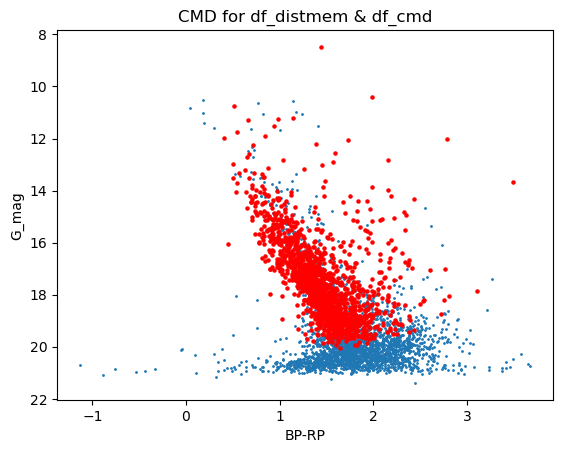

In [142]:
# Color Magnitude diagram of the star cluster(??)
plt.scatter(df_mem_dist['BP-RP'],df_mem_dist['Gmag'],s=1.0)
plt.scatter(df_sPlx['BP-RP'],df_sPlx['Gmag'],s=5.0,c='red')
plt.gca().invert_yaxis()
plt.title('CMD for df_distmem & df_cmd')
plt.xlabel('BP-RP')
plt.ylabel('G_mag')

# Isochrone Fitting (CMD input form logage= 7.0 to 8.0yr)

## Logage = 6.5 yr

In [143]:
isochrones_65_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.5.txt',skiprows=1)

In [144]:
isochrones_65 = pd.DataFrame(data=isochrones_65_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [145]:
isochrones_65['BP-RP'] = isochrones_65['G_BPmag']-isochrones_65['G_RPmag']

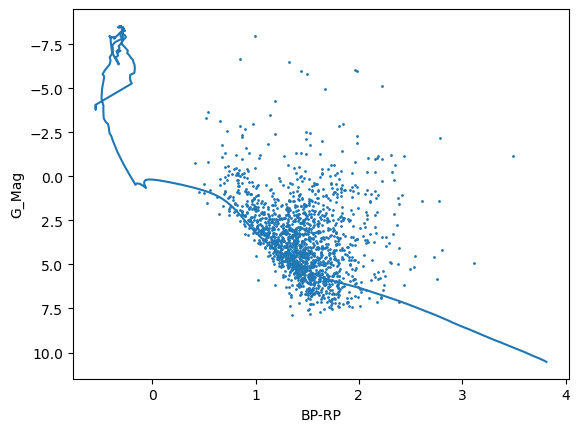

In [146]:
plt.plot(isochrones_65['BP-RP'],isochrones_65['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

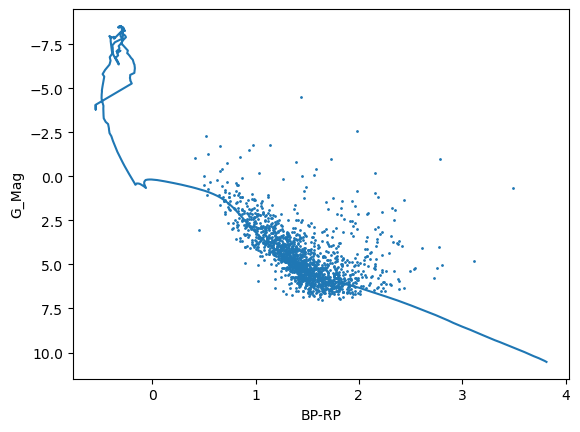

In [147]:
plt.plot(isochrones_65['BP-RP'],isochrones_65['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.6 yr

In [148]:
isochrones_66_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.6.txt',skiprows=1)

In [149]:
isochrones_66 = pd.DataFrame(data=isochrones_66_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [150]:
isochrones_66['BP-RP'] = isochrones_66['G_BPmag']-isochrones_66['G_RPmag']

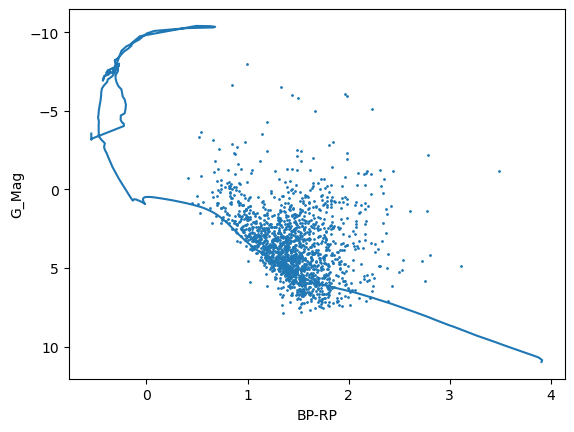

In [151]:
plt.plot(isochrones_66['BP-RP'],isochrones_66['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

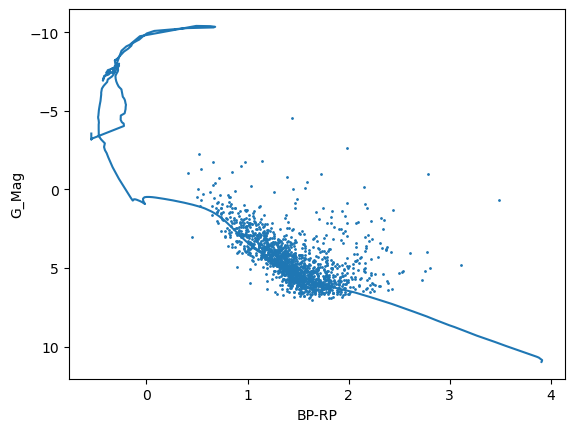

In [152]:
plt.plot(isochrones_66['BP-RP'],isochrones_66['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.7 yr

In [153]:
isochrones_67_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.7.txt',skiprows=1)

In [154]:
isochrones_67 = pd.DataFrame(data=isochrones_67_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [155]:
isochrones_67['BP-RP'] = isochrones_67['G_BPmag']-isochrones_67['G_RPmag']

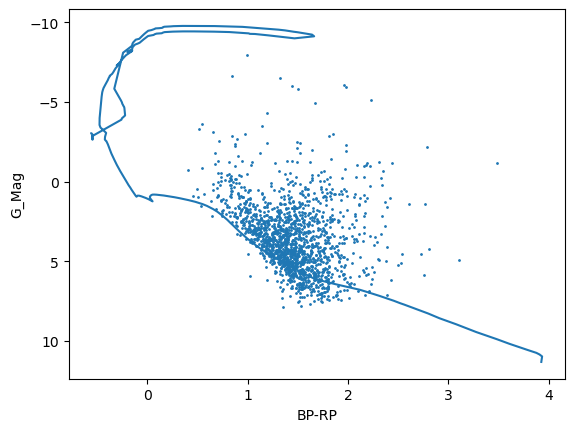

In [156]:
plt.plot(isochrones_67['BP-RP'],isochrones_67['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

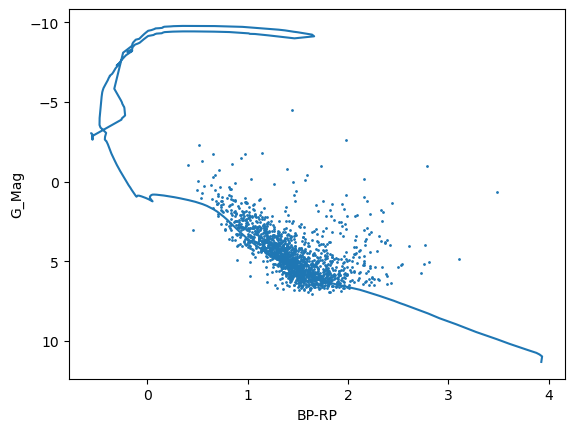

In [157]:
plt.plot(isochrones_67['BP-RP'],isochrones_67['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.8 yr

In [158]:
isochrones_68_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.8.txt',skiprows=1)

In [159]:
isochrones_68 = pd.DataFrame(data=isochrones_68_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [160]:
isochrones_68['BP-RP'] = isochrones_68['G_BPmag']-isochrones_68['G_RPmag']

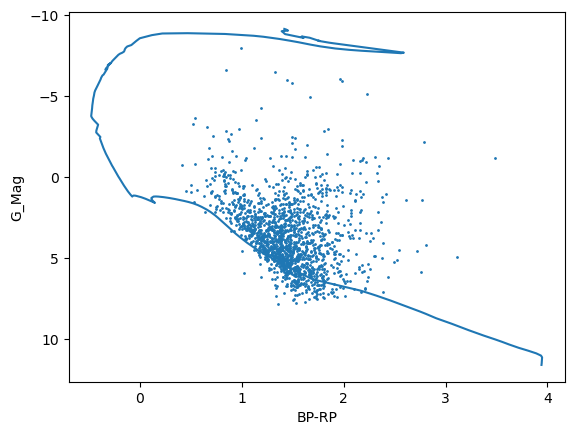

In [161]:
plt.plot(isochrones_68['BP-RP'],isochrones_68['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

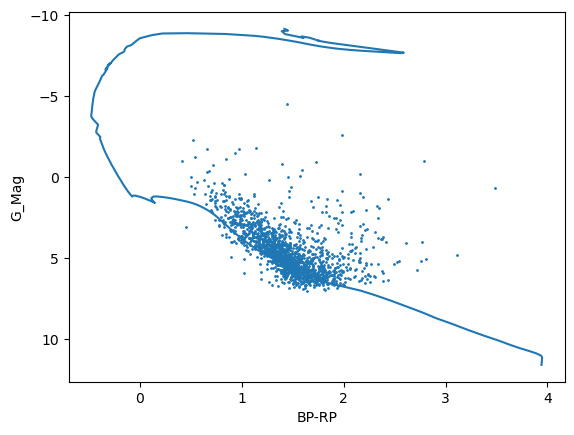

In [162]:
plt.plot(isochrones_68['BP-RP'],isochrones_68['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 6.9 yr

In [163]:
isochrones_69_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/6.9.txt',skiprows=1)

In [164]:
isochrones_69 = pd.DataFrame(data=isochrones_69_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [165]:
isochrones_69['BP-RP'] = isochrones_69['G_BPmag']-isochrones_69['G_RPmag']

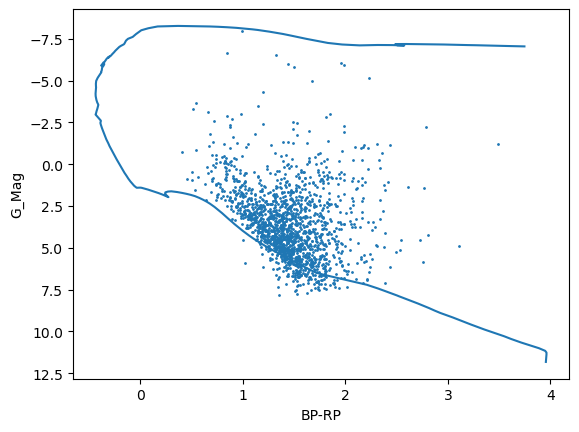

In [166]:
plt.plot(isochrones_69['BP-RP'],isochrones_69['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

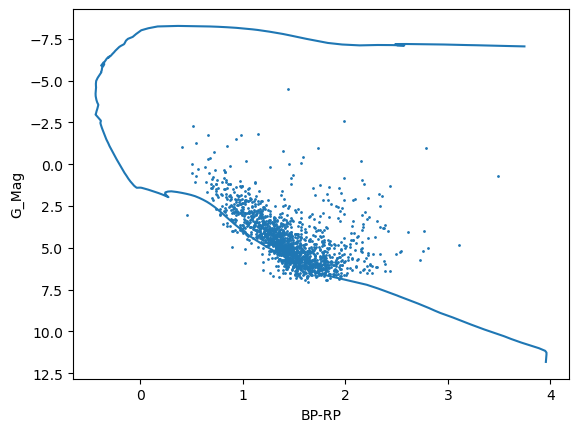

In [167]:
plt.plot(isochrones_69['BP-RP'],isochrones_69['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## All together

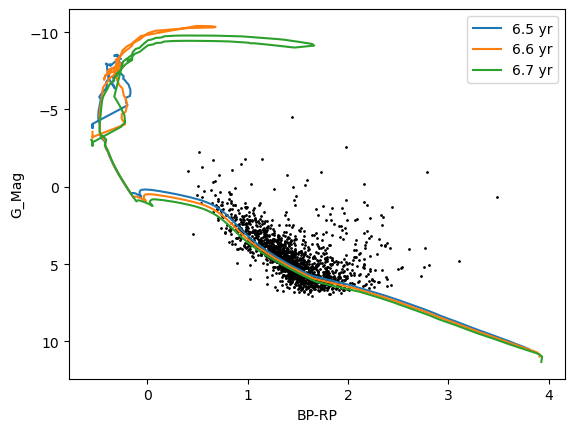

In [226]:
plt.plot(isochrones_65['BP-RP'], isochrones_65['Gmag'], label='6.5 yr')
plt.plot(isochrones_66['BP-RP'], isochrones_66['Gmag'], label='6.6 yr')
plt.plot(isochrones_67['BP-RP'], isochrones_67['Gmag'], label='6.7 yr')
#plt.plot(isochrones_68['BP-RP'], isochrones_68['Gmag'])
#plt.plot(isochrones_69['BP-RP'], isochrones_69['Gmag'])
plt.scatter(df_cmd['BP-RP'], df_cmd['M_Gmag_theory'], s=1.0, c='k')


plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

plt.legend()


## Logage = 7.0 yr

In [169]:
isochrones_70_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.0.txt',skiprows=1)

In [170]:
isochrones_70 = pd.DataFrame(data=isochrones_70_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [171]:
isochrones_70['BP-RP'] = isochrones_70['G_BPmag']-isochrones_70['G_RPmag']

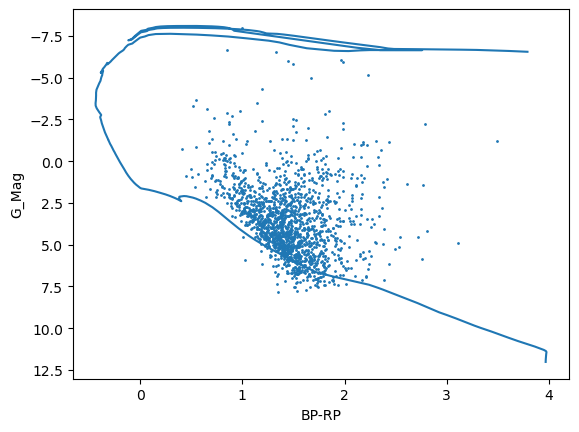

In [172]:
plt.plot(isochrones_70['BP-RP'],isochrones_70['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

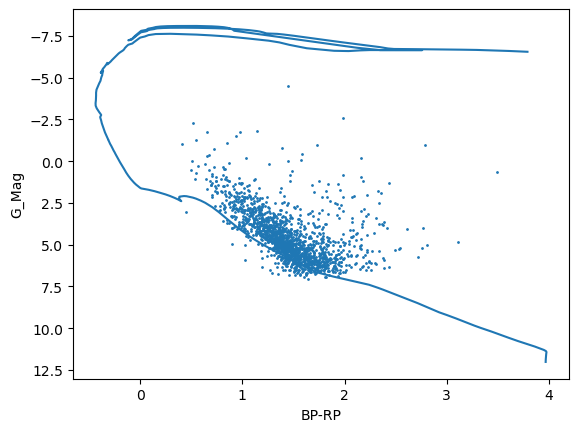

In [173]:
plt.plot(isochrones_70['BP-RP'],isochrones_70['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.1 yr

In [174]:
isochrones_71_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.1.txt',skiprows=1)

In [175]:
isochrones_71 = pd.DataFrame(data=isochrones_71_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [176]:
isochrones_71['BP-RP'] = isochrones_71['G_BPmag']-isochrones_71['G_RPmag']

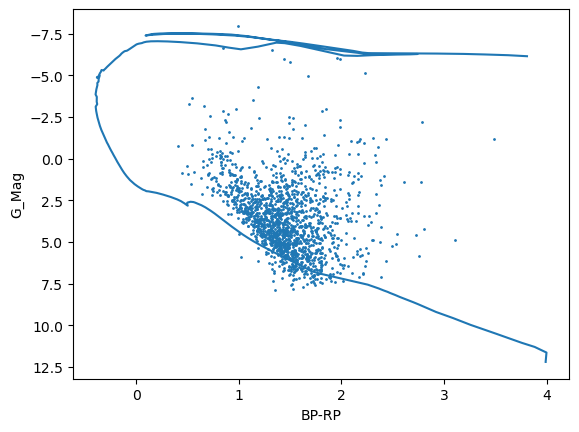

In [177]:
plt.plot(isochrones_71['BP-RP'],isochrones_71['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

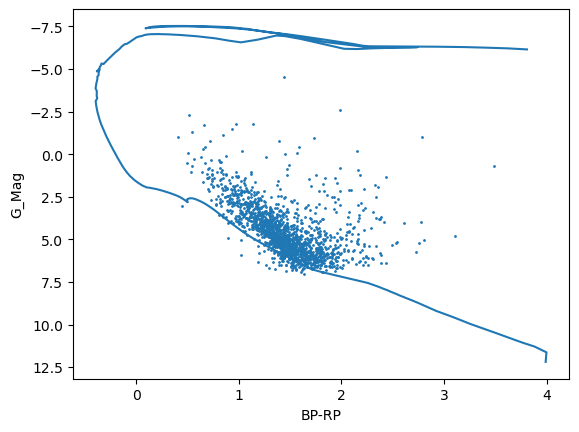

In [178]:
plt.plot(isochrones_71['BP-RP'],isochrones_71['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.2 yr

In [179]:
isochrones_72_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.2.txt',skiprows=1)

In [180]:
isochrones_72 = pd.DataFrame(data=isochrones_72_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [181]:
isochrones_72['BP-RP'] = isochrones_72['G_BPmag']-isochrones_72['G_RPmag']

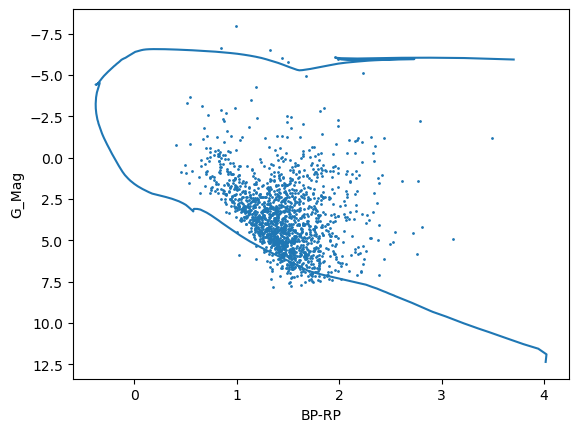

In [182]:
plt.plot(isochrones_72['BP-RP'],isochrones_72['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

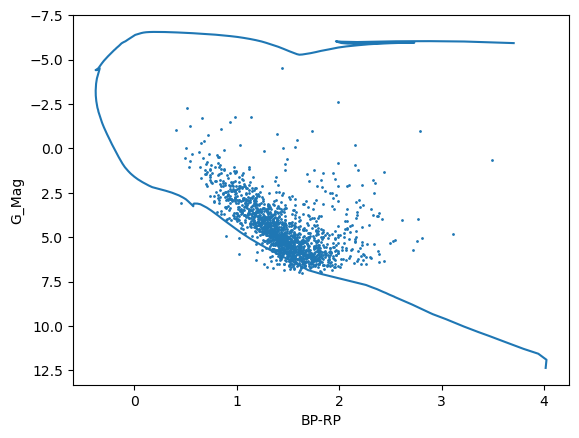

In [183]:
plt.plot(isochrones_72['BP-RP'],isochrones_72['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag_theory'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.3 yr

In [184]:
isochrones_73_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.3.txt',skiprows=1)

In [185]:
isochrones_73 = pd.DataFrame(data=isochrones_73_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [186]:
isochrones_73['BP-RP'] = isochrones_73['G_BPmag']-isochrones_73['G_RPmag']

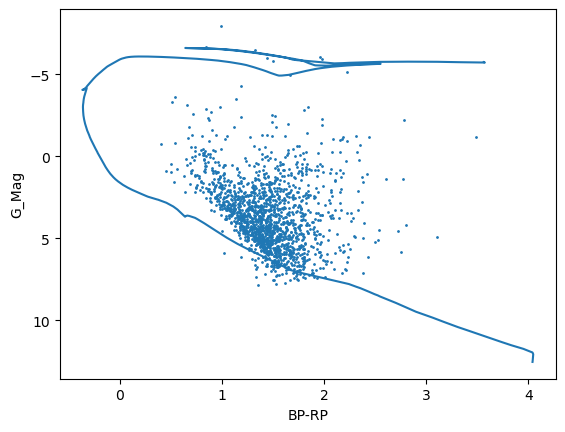

In [187]:
plt.plot(isochrones_73['BP-RP'],isochrones_73['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

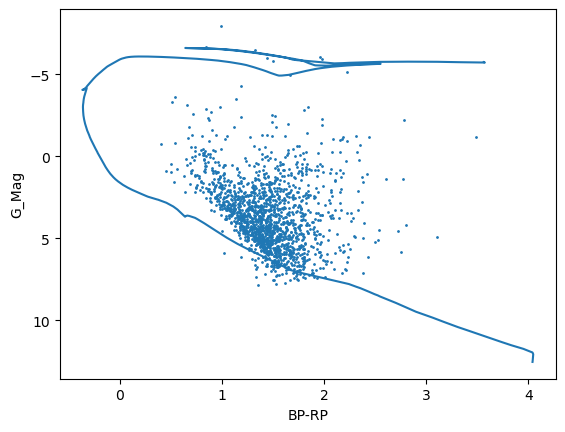

In [188]:
plt.plot(isochrones_73['BP-RP'],isochrones_73['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.4 yr

In [189]:
isochrones_74_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.4.txt',skiprows=1)

In [190]:
isochrones_74 = pd.DataFrame(data=isochrones_74_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [191]:
isochrones_74['BP-RP'] = isochrones_74['G_BPmag']-isochrones_74['G_RPmag']

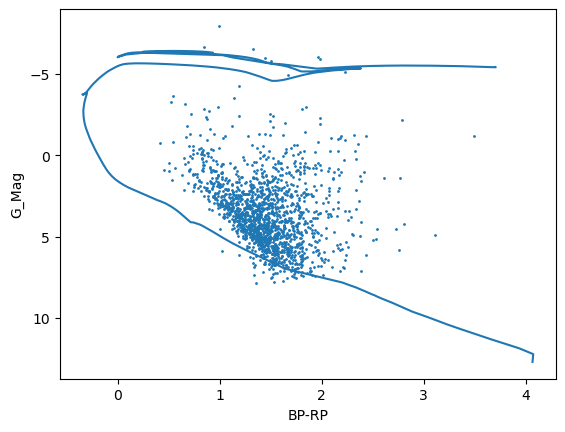

In [192]:
plt.plot(isochrones_74['BP-RP'],isochrones_74['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

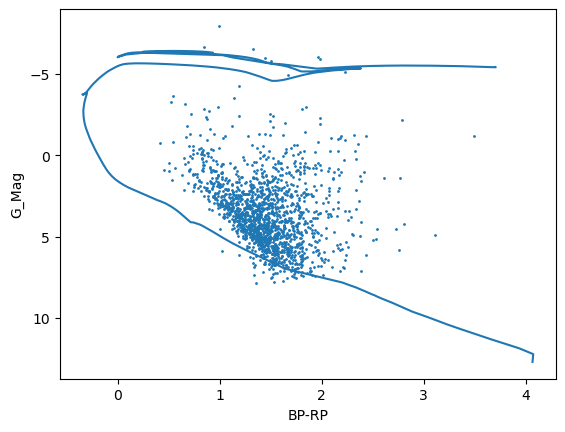

In [193]:
plt.plot(isochrones_74['BP-RP'],isochrones_74['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.5 yr

In [194]:
isochrones_75_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.5.txt',skiprows=1)

In [195]:
isochrones_75 = pd.DataFrame(data=isochrones_75_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [196]:
isochrones_75['BP-RP'] = isochrones_75['G_BPmag']-isochrones_75['G_RPmag']

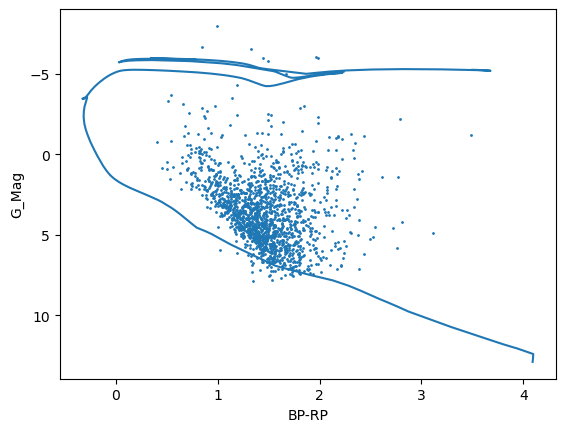

In [197]:
plt.plot(isochrones_75['BP-RP'],isochrones_75['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

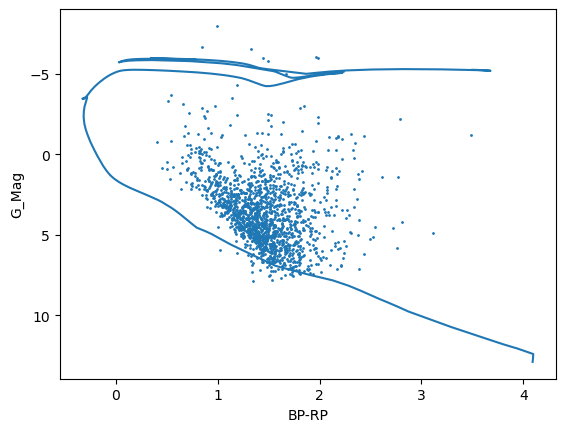

In [198]:
plt.plot(isochrones_75['BP-RP'],isochrones_75['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.6 yr

In [199]:
isochrones_76_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.6.txt',skiprows=1)

In [200]:
isochrones_76 = pd.DataFrame(data=isochrones_76_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [201]:
isochrones_76['BP-RP'] = isochrones_76['G_BPmag']-isochrones_76['G_RPmag']

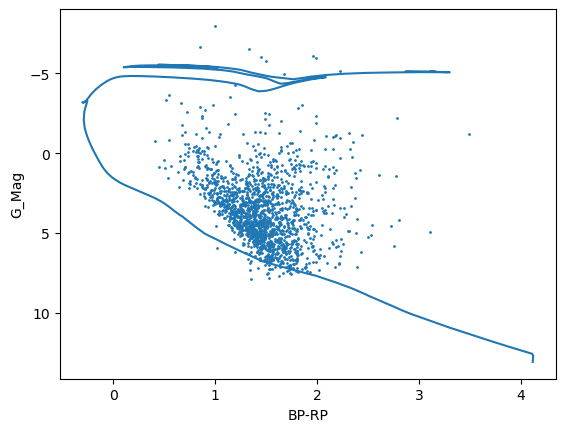

In [202]:
plt.plot(isochrones_76['BP-RP'],isochrones_76['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

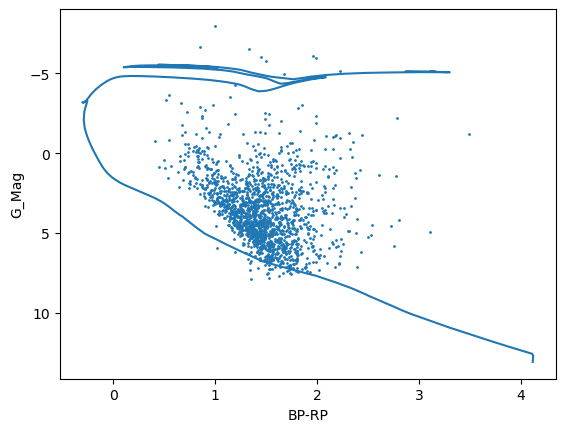

In [203]:
plt.plot(isochrones_76['BP-RP'],isochrones_76['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.7 yr

In [204]:
isochrones_77_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.7.txt',skiprows=1)

In [205]:
isochrones_77 = pd.DataFrame(data=isochrones_77_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [206]:
isochrones_77['BP-RP'] = isochrones_77['G_BPmag']-isochrones_77['G_RPmag']

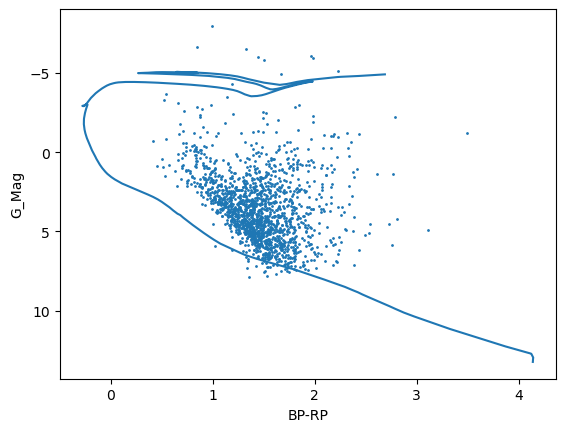

In [207]:
plt.plot(isochrones_77['BP-RP'],isochrones_77['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

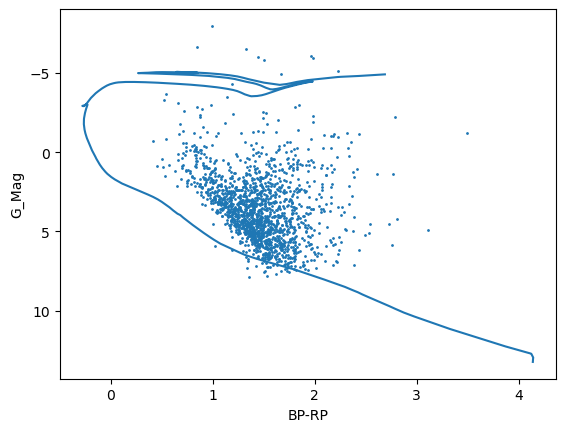

In [208]:
plt.plot(isochrones_77['BP-RP'],isochrones_77['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.8 yr

In [209]:
isochrones_78_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.8.txt',skiprows=1)

In [210]:
isochrones_78 = pd.DataFrame(data=isochrones_78_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [211]:
isochrones_78['BP-RP'] = isochrones_78['G_BPmag']-isochrones_78['G_RPmag']

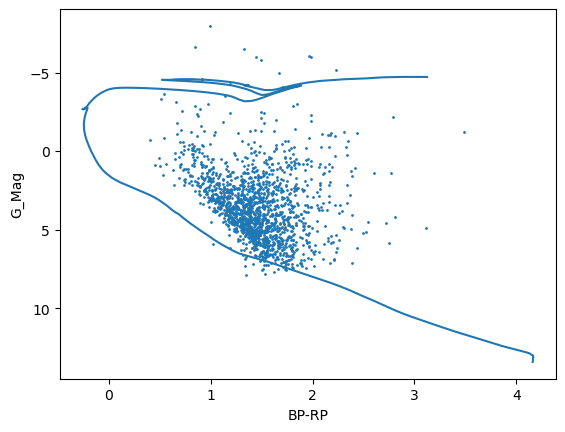

In [212]:
plt.plot(isochrones_78['BP-RP'],isochrones_78['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

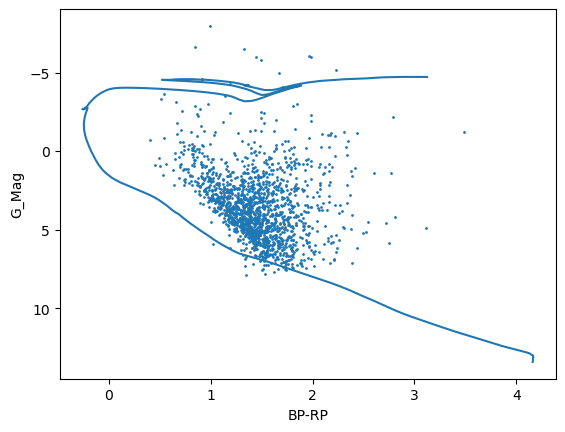

In [213]:
plt.plot(isochrones_78['BP-RP'],isochrones_78['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 7.9 yr

In [214]:
isochrones_79_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/7.9.txt',skiprows=1)

In [215]:
isochrones_79 = pd.DataFrame(data=isochrones_79_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [216]:
isochrones_79['BP-RP'] = isochrones_79['G_BPmag']-isochrones_79['G_RPmag']

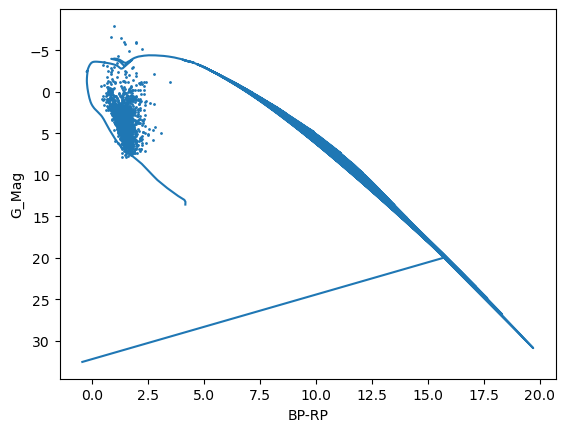

In [217]:
plt.plot(isochrones_79['BP-RP'],isochrones_79['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

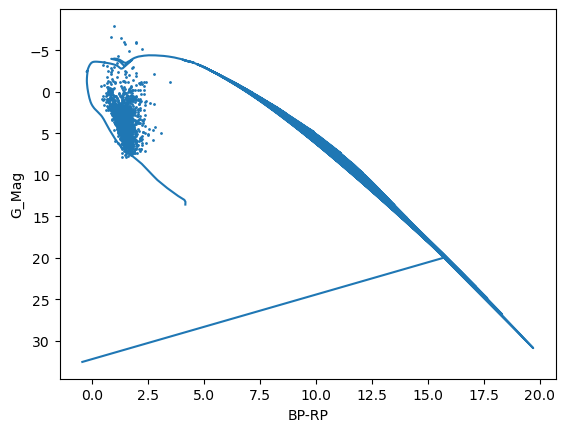

In [218]:
plt.plot(isochrones_79['BP-RP'],isochrones_79['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

## Logage = 8.0 yr

In [219]:
isochrones_80_np = np.loadtxt('CMD3.7_6.5_8.0_0.1/8.0.txt',skiprows=1)

In [220]:
isochrones_80 = pd.DataFrame(data=isochrones_80_np,columns=['Zini','MH','logAge','Mini','int_IMF','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','period2','period3','period4','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag'],dtype=np.float64)

In [221]:
isochrones_80['BP-RP'] = isochrones_80['G_BPmag']-isochrones_80['G_RPmag']

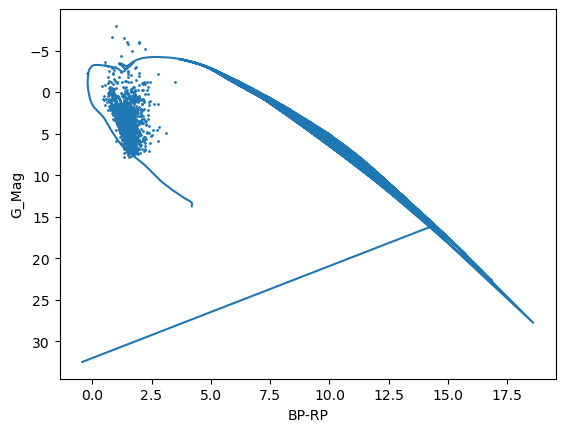

In [222]:
plt.plot(isochrones_80['BP-RP'],isochrones_80['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()

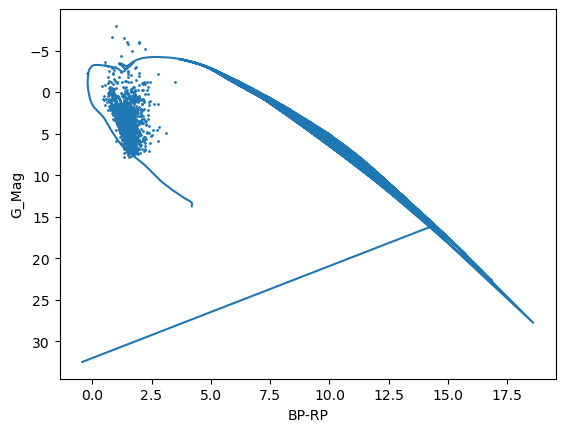

In [223]:
plt.plot(isochrones_80['BP-RP'],isochrones_80['Gmag'])
plt.scatter(df_cmd['BP-RP'],df_cmd['M_Gmag'],s=1.0)

plt.xlabel('BP-RP')
plt.ylabel('G_Mag')
plt.gca().invert_yaxis()